In [20]:
# import desired packages
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
%matplotlib inline 

In [21]:
# Define the encoder function
def one_hot_encode(labels):
    n_labels=len(labels)
    n_unique_labels=len(np.unique(labels))
    one_hot_encode=np.zeros((n_labels, n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels]=1
    return one_hot_encode

In [22]:
# Define the read dataset function
def read_dataset():
    iris = sns.load_dataset("iris")
    # plot the data  
    g = sns.lmplot(x="sepal_length", y="sepal_width", hue="species",
               truncate=True, size=5, data=iris)
    # split fertures and targets
    # get the data of virginica and versicolor
    X=iris.iloc[50:150,0:4].values
    y=iris.iloc[50:150,4]
    # Encode the dependent variable
    # Encode labels with value between 0 and n_classes-1.
    encoder=LabelEncoder()
    encoder.fit(y)
    encoder.classes_
    y=encoder.transform(y)
    Y=one_hot_encode(y)
    print(X.shape)
    return(X,Y)

In [23]:
# Prepare the data 
def prepare_dataset():
    # prepare the data for splitting
    X, Y=read_dataset()
    # X1 and Y1 means virginica, X2 and Y2 means versicolor
    X1=X[0:50,]
    Y1=Y[0:50,]
    X2=X[50:100,]
    Y2=Y[50:100,]
    # shuffle the data for virginica
    # randome_state: the seed of the pseudo random number generator to use when shuffling the data
    X1, Y1=shuffle(X1,Y1, random_state=1)
    # convert the dataset into train and test part
    train_x1, test_x1, train_y1, test_y1=train_test_split(X1,Y1,test_size=0.20)
    # shuffle the data for versicolor
    # randome_state: the seed of the pseudo random number generator to use when shuffling the data
    X2, Y2=shuffle(X2,Y2, random_state=2)
    # convert the dataset into train and test part
    train_x2, test_x2, train_y2, test_y2=train_test_split(X2,Y2,test_size=0.20)
    # combine the data into train data and test data
    train_x=np.concatenate((train_x1, train_x2), axis=0)
    train_y=np.concatenate((train_y1, train_y2), axis=0)
    test_x=np.concatenate((test_x1, test_x2), axis=0)
    test_y=np.concatenate((test_y1, test_y2), axis=0)
    return(train_x, train_y, test_x, test_y)

(100, 4)


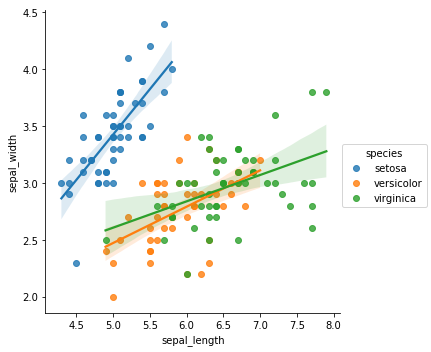

In [24]:
# get the prepared data
train_x, train_y, test_x, test_y=prepare_dataset()

In [25]:
# Define the important parameters and variables to work with the tensors
learning_rate=0.01
training_epochs=1000
cost_history=np.empty(shape=[1],dtype=float)

In [27]:
# placeholders and variables, input has 4 features and output has 2 classes
x=tf.placeholder(tf.float32, shape=[None,4])
y_=tf.placeholder(tf.float32, shape=[None,2])
# weight and bias
w=tf.Variable(tf.zeros([4,2]))
b=tf.Variable(tf.zeros([2]))

In [29]:
# model
# sigmoid function for two classes classfication
y=tf.nn.sigmoid(tf.matmul(x,w)+b)
# Define the cost function and optimizer
cost_function=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y, labels=y_))
training_step=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

In [30]:
# Initialize all the variables
init=tf.global_variables_initializer()
saver=tf.train.Saver()

In [31]:
# define session as sess
sess=tf.Session()
sess.run(init)

In [35]:
# Calculate the cost and accuracy for each epoch
mse_history=[]
accuracy_history=[]

for epoch in range(training_epochs):
    _,cost=sess.run([training_step,cost_function],feed_dict={x: train_x, y_: train_y})
    cost_history=np.append(cost_history,cost)
    correct_prediction=tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy0=tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    pred_y=sess.run(y, feed_dict={x: test_x})
    mse=tf.reduce_mean(tf.square(pred_y-test_y))
    mse_=sess.run(mse)
    mse_history.append(mse_)
    accuracy=sess.run(accuracy0, feed_dict={x: train_x, y_: train_y})
    accuracy_history.append(accuracy)
    if epoch%100==0:
        print('epoch : ', epoch, '-cost: ', cost, "-MSE:", mse_,"-Train Accuracy: ", accuracy)  

epoch :  0 -cost:  0.6471031 -MSE: 0.19923918272348612 -Train Accuracy:  0.7625
epoch :  200 -cost:  0.63918996 -MSE: 0.1909887105057672 -Train Accuracy:  0.825
epoch :  400 -cost:  0.6315603 -MSE: 0.18316665688540482 -Train Accuracy:  0.8625
epoch :  600 -cost:  0.62421644 -MSE: 0.175763179313961 -Train Accuracy:  0.8875
epoch :  800 -cost:  0.61715734 -MSE: 0.1687653278328782 -Train Accuracy:  0.9


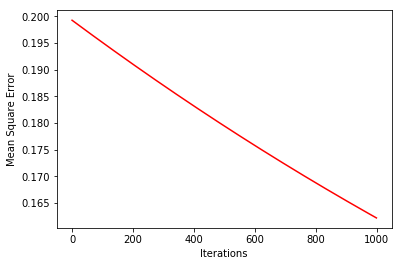

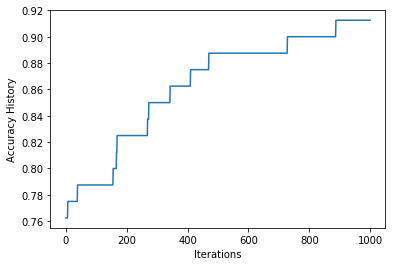

In [58]:
# plot mse and accuracy graph
plt.plot(mse_history,'r')
plt.xlabel('Iterations')
plt.ylabel('Mean Square Error')
plt.show()
plt.plot(accuracy_history)
plt.xlabel('Iterations')
plt.ylabel('Accuracy History')
plt.show()

In [53]:
# get the weights
sess.run(w)

array([[ 0.37670478, -0.37670484],
       [ 0.29259568, -0.2925958 ],
       [-0.5506522 ,  0.5506523 ],
       [-0.4934151 ,  0.49341512]], dtype=float32)

In [54]:
# get the bias
sess.run(b)

array([ 0.16410439, -0.16410442], dtype=float32)

In [55]:
# Print the final prediction accuracy
correct_prediction=tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy0=tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
accuracy=sess.run(accuracy0, feed_dict={x: train_x, y_: train_y})
print("Test Accuracy: ", accuracy)

Test Accuracy:  0.9125


In [56]:
# Print the final mean square error
pred_y=sess.run(y, feed_dict={x: test_x})
mse=tf.reduce_mean(tf.square(pred_y-test_y))
print("MSE: %.4f" % sess.run(mse))

MSE: 0.1622
